# Project Day 3

We begin by importing our dataframe

In [164]:
import pandas as pd
url = "https://raw.githubusercontent.com/becharah/GESISPython/main/Project/Climate_twitter.csv"
data = pd.read_csv(url)

First step, let's explore our dataset

In [118]:
# we can check the variables we have
data.columns

# we can check the first 10 rows of the data
data.head()

,id,retweets,likes,verified,followers,friends,subjectivity
0,2184934963,71,91,False,23415,20439,0.426984
1,508658626,14,98,False,6615,508,0.633333
2,2607105006,0,1,False,22,133,0.345238
3,19609660,0,0,False,4191,3708,0.000000
4,19609660,1,1,False,4191,3708,0.000000


In [8]:
# We can check the data types of our columns

# Version 1, the long way
for i in data.columns:
    print(i, type(data[i][0]))

# Version 2, the short way
data.dtypes

id <class 'numpy.int64'>
date <class 'str'>
retweets <class 'numpy.int64'>
source <class 'str'>
author <class 'str'>
likes <class 'numpy.int64'>
text <class 'str'>
twitter_name <class 'str'>
location <class 'float'>
verified <class 'numpy.bool_'>
followers <class 'numpy.int64'>
friends <class 'numpy.int64'>
polarity <class 'numpy.float64'>
subjectivity <class 'numpy.float64'>


id                int64
date             object
retweets          int64
source           object
author           object
likes             int64
text             object
twitter_name     object
location         object
verified           bool
followers         int64
friends           int64
polarity        float64
subjectivity    float64
dtype: object

In [12]:
# We can check the number of rows and columns
# Long way
len(data.columns)
len(data)

# Short way
data.shape

(396, 14)

In [13]:
# We can check the number of missing values
data.isnull().sum()

# This is expected. The rest of our data is doing ok.

id                0
date              0
retweets          0
source            0
author            0
likes             0
text              0
twitter_name      0
location        103
verified          0
followers         0
friends           0
polarity          0
subjectivity      0
dtype: int64

In [17]:
# We can check the number of unique values
data.nunique()

# We can check the number of unique values for a specific column
data["location"].nunique()

# There's one column that has 2 unique values. Prob a binary variable. Let's check it out
data["verified"].unique()

data["verified"]

0      False
1      False
2      False
3      False
4      False
       ...  
391    False
392    False
393    False
394    False
395    False
Name: verified, Length: 396, dtype: bool

In [18]:
# We can check the number of times each value appears in a column
data["verified"].value_counts()

verified
False    375
True      21
Name: count, dtype: int64

In [89]:
# For data science purposes, we don't like boolean, we like 0 and 1

# We can change the values of a column
data["verified"] = data["verified"].replace({True: 1, False: 0})

# What happened there?

In [19]:
data

,id,date,retweets,source,author,likes,text,twitter_name,location,verified,followers,friends,polarity,subjectivity
0,2184934963,2020-12-22 23:22:20,71,Twitter Web App,GO GREEN,91,The death of summer Arctic ice our Earth coole...,ECOWARRIORSS,NaN,False,23415,20439,-0.054365,0.426984
1,508658626,2020-12-10 14:30:00,14,Twitter for Advertisers,Elsevier Energy,98,@Elsevier and the @EditorsinChief are pleased ...,ElsevierEnergy,"Oxford, England",False,6615,508,0.387500,0.633333
2,2607105006,2020-12-22 21:28:52,0,Twitter Web App,Arwyn Thomas,1,From better climate change education to improv...,siwarr5,Carmarthen,False,22,133,0.261905,0.345238
3,19609660,2020-12-22 21:24:10,0,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",0,climate change Links to FIXING CLIMATE CHANGE ...,EDITORatWORK,"Rural Hall, North Carolina, USA",False,4191,3708,0.000000,0.000000
4,19609660,2020-12-21 22:52:09,1,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",1,climate change The 11TH HOUR FOR THE EARTH #cl...,EDITORatWORK,"Rural Hall, North Carolina, USA",False,4191,3708,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,54992908,2020-01-03 12:29:11,0,Twitter Web App,Sascha Becher,0,An Inconsistent Truth From global cooling 1970...,SaschaBecher,Deutschland,False,132,132,0.000000,0.000000
392,209636315,2020-01-02 08:38:37,0,Twitter for iPhone,Morgan Fitzgibbon,0,2 climate thought alongside Einstein Robert Op...,morganefitz,"Cork, Ireland",False,286,156,0.194444,0.494444
393,209636315,2020-01-02 08:35:52,0,Twitter for iPhone,Morgan Fitzgibbon,0,3 climate used as supporting evidence that man...,morganefitz,"Cork, Ireland",False,286,156,0.286667,0.466667
394,21769361,2020-01-02 03:47:08,0,Twitter for iPhone,STEⓋE BOZIC,0,Global warming Global government via YouTube c...,STEVE_BOZIC,"ÜT: 43.863963,-79.749634",False,478,738,0.000000,0.000000


In [21]:
# We can create new columns using indexing
data['new_column'] = len(data['text'])

In [23]:
# Let's inspect our new column

data.head()

,id,date,retweets,source,author,likes,text,twitter_name,location,verified,followers,friends,polarity,subjectivity,new_column,text_length
0,2184934963,2020-12-22 23:22:20,71,Twitter Web App,GO GREEN,91,The death of summer Arctic ice our Earth coole...,ECOWARRIORSS,NaN,False,23415,20439,-0.054365,0.426984,396,396
1,508658626,2020-12-10 14:30:00,14,Twitter for Advertisers,Elsevier Energy,98,@Elsevier and the @EditorsinChief are pleased ...,ElsevierEnergy,"Oxford, England",False,6615,508,0.387500,0.633333,396,396
2,2607105006,2020-12-22 21:28:52,0,Twitter Web App,Arwyn Thomas,1,From better climate change education to improv...,siwarr5,Carmarthen,False,22,133,0.261905,0.345238,396,396
3,19609660,2020-12-22 21:24:10,0,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",0,climate change Links to FIXING CLIMATE CHANGE ...,EDITORatWORK,"Rural Hall, North Carolina, USA",False,4191,3708,0.000000,0.000000,396,396
4,19609660,2020-12-21 22:52:09,1,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",1,climate change The 11TH HOUR FOR THE EARTH #cl...,EDITORatWORK,"Rural Hall, North Carolina, USA",False,4191,3708,0.000000,0.000000,396,396


In [ ]:
# Let's change the name of the column
data = data.rename(columns={'new_column': 'text_length'})

# You can always rename columns if you don't like the names 

In [ ]:
# Can we create a new column based on a condition?
data['size_boolean'] = data['text_length'] > 140

# Can we make it even better, can we make it binary? Let's use a list comprehension
data['size_binary'] = [1 if i > 140 else 0 for i in data['text_length']]

# What happened there?
# for i in data['text_length']:
#     if i > 140:
#         print(1)
#     else:
#         print(0)
        

In [24]:
# You can superscript and subscript in your column values
data['text_length'] = data['text_length'].astype(str) + ' characters'

data.head()

In [25]:
# Let's undo that, that's not helpful at all
data['text_length'] = len(data['text_length'])

In [ ]:
# Now it's your turn 

# 1. Create a subset of the data for the verified users. Call it vf_data

# 2. Check the number of rows and columns of vf_data

# 3. Check the number of missing values in vf_data

# 4. Get the average number of followers of the verified users. Now do the same for unverified users.
#    Which is bigger?


In [27]:
# Can we do this in one line of code? 

data.groupby('verified')['followers'].mean()

# What does groupby do?

verified
False      3650.674667
True     151146.809524
Name: followers, dtype: float64

In [31]:
# Try it now with another variable and check retweets

data.groupby('source')['retweets'].mean()

# We see a big outlier!
data.groupby('source')['retweets'].mean().sort_values(ascending=False)

source
Granite Media                       161.000000
Twitter for Advertisers              14.000000
Twitter Web Client                    3.695652
Twitter Web App                       3.681818
TweetDeck                             2.200000
Twitter for iPhone                    1.969697
Hootsuite Inc.                        1.440000
Twitter for iPad                      1.181818
Buffer                                1.000000
Facebook                              1.000000
Twitter for Android                   0.420000
Spreaker                              0.200000
Prothom Alo English                   0.000000
Tumblr                                0.000000
Blog2Social APP                       0.000000
News Users                            0.000000
Twitter for Advertisers (legacy)      0.000000
Twittimer                             0.000000
WordPress.com                         0.000000
PromotePictures                       0.000000
MonkeyViral Auto Post                 0.000000
MrPyro

In [35]:
# Who is Granite media? Subset

data[data['source'] == 'Granite Media']

# What did they write?
data[data['source'] == 'Granite Media']['text']

,id,date,retweets,source,author,likes,text,twitter_name,location,verified,followers,friends,polarity,subjectivity,new_column,text_length
106,974356729856053248,2020-02-06 05:17:18,161,Granite Media,Far & Wide,883,Yes thats right Every single country,FarandWidecom,"San Francisco, CA",False,28125,16,0.107143,0.375,396,396


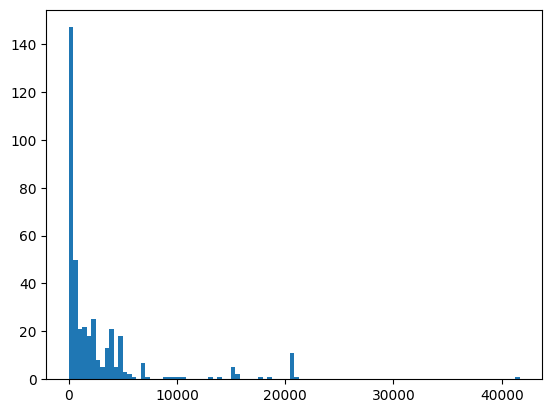

In [42]:
# Let's visualize our data now. We will use matplotlib
import matplotlib.pyplot as plt

# Let's plot the number of followers
plt.hist(data['friends'], bins=100)
plt.show()


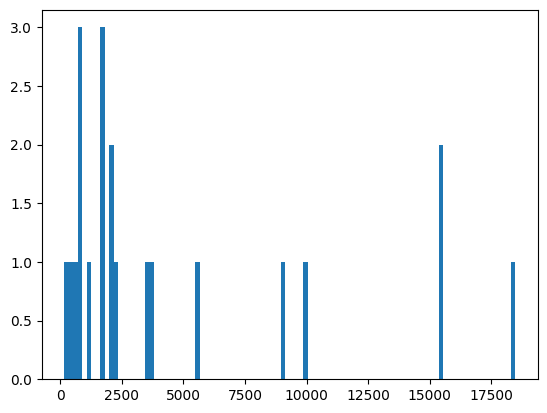

In [43]:
# Let's plot the number of followers for verified users
plt.hist(data[data['verified'] == 1]['friends'], bins=100)
plt.show()


In [ ]:
# If groups you will now do the following exercise

# Plot the date of the tweets

# Plot polarity of the tweets

## Let's do a pipeline for numerical values and create a small model

In [143]:
# First we need to make sure we are only using numerical variables 

data.dtypes

id                int64
date             object
retweets          int64
source           object
author           object
likes             int64
text             object
twitter_name     object
location         object
verified           bool
followers         int64
friends           int64
polarity        float64
subjectivity    float64
dtype: object

In [165]:
# We will drop for now 
data = data.drop(['id', 'date', 'source', 'author', 'text', 'twitter_name', 'location'], axis=1)

In [166]:
# Check data types again
data.dtypes

retweets          int64
likes             int64
verified           bool
followers         int64
friends           int64
polarity        float64
subjectivity    float64
dtype: object

<Axes: >

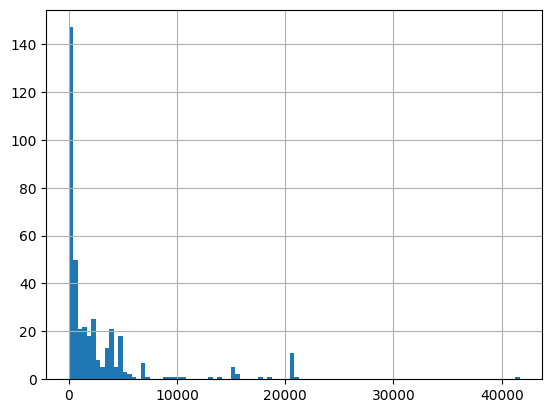

In [167]:
# We will inspect our target value, friends
data['friends'].hist(bins=100)

In [168]:
# Set data and target (x and y)
data, target = data.drop(columns="friends"), data["friends"]

In [169]:
# We can see the shape of our data again
data.head()

,retweets,likes,verified,followers,polarity,subjectivity
0,71,91,False,23415,-0.054365,0.426984
1,14,98,False,6615,0.387500,0.633333
2,0,1,False,22,0.261905,0.345238
3,0,0,False,4191,0.000000,0.000000
4,1,1,False,4191,0.000000,0.000000


In [170]:
# Now we will separate our data into train and test

from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42, test_size=0.25
)

In [171]:
# how many samples are here?
data_train.shape

(297, 6)

In [172]:
# how many samples are here?
target_train.shape

(297,)

In [173]:
print(
    f"Number of samples in testing: {data_test.shape[0]} => "
    f"{data_test.shape[0] / data.shape[0] * 100:.1f}% of the"
    " original set"
)

Number of samples in testing: 99 => 25.0% of the original set


In [174]:
print(
    f"Number of samples in training: {data_train.shape[0]} => "
    f"{data_train.shape[0] / data.shape[0] * 100:.1f}% of the"
    " original set"
)

Number of samples in training: 297 => 75.0% of the original set


In [175]:
# We first need to import the linear regression model and set it

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [176]:
# We can now fit
model.fit(data_train, target_train)

LinearRegression()

In [178]:
# Get the regression values of the model
print(model.coef_)
print(model.intercept_)

[ 3.18949074e+02 -6.15259010e+01  7.85052872e+01 -5.58810968e-03
 -3.12041879e+03  4.17372072e+02]
2219.7824259438567


In [179]:
# This is the data we used to predict number of friends
data.head()

,retweets,likes,verified,followers,polarity,subjectivity
0,71,91,False,23415,-0.054365,0.426984
1,14,98,False,6615,0.387500,0.633333
2,0,1,False,22,0.261905,0.345238
3,0,0,False,4191,0.000000,0.000000
4,1,1,False,4191,0.000000,0.000000


In [180]:
# Let's make a fake tweet and predict the number of friends

model.predict([[10, 3, True, 4, 0, 0]])

/Users/paulina/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5303.17839781])